In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.transform import resize
import glob
import os

In [2]:
import os
os.getcwd()

'C:\\Users\\Elvis\\dl_course_2020\\notebooks'

In [3]:
import re
def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [4]:
Pfade=np.asarray(sorted(glob.glob("C:\\Users\\Elvis\\Desktop\\UTKFace\\*"), key=natural_key))
print(Pfade)


['C:\\Users\\Elvis\\Desktop\\UTKFace\\1_0_0_20161219140623097.jpg.chip.jpg'
 'C:\\Users\\Elvis\\Desktop\\UTKFace\\1_0_0_20161219140627985.jpg.chip.jpg'
 'C:\\Users\\Elvis\\Desktop\\UTKFace\\1_0_0_20161219140642920.jpg.chip.jpg'
 ...
 'C:\\Users\\Elvis\\Desktop\\UTKFace\\116_1_0_20170120134921760.jpg.chip.jpg'
 'C:\\Users\\Elvis\\Desktop\\UTKFace\\116_1_2_20170112220255503.jpg.chip.jpg'
 'C:\\Users\\Elvis\\Desktop\\UTKFace\\116_1_3_20170120134744096.jpg.chip.jpg']


In [5]:
#[age]_[gender]_[race]_[date&time].jpg
#[age] is an integer from 0 to 116, indicating the age
#[gender] is either 0 (male) or 1 (female)

In [6]:
Pfade[0].split("\\")

['C:',
 'Users',
 'Elvis',
 'Desktop',
 'UTKFace',
 '1_0_0_20161219140623097.jpg.chip.jpg']

In [7]:
Alter=np.array([np.array(Pfade[i].split("\\")[-1].split("_")[0],dtype="int") for i in range(0,len(Pfade))])

(array([3413., 2631., 9063., 3141., 2688., 1400.,  854.,  446.,   54.,
          18.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <a list of 10 Patch objects>)

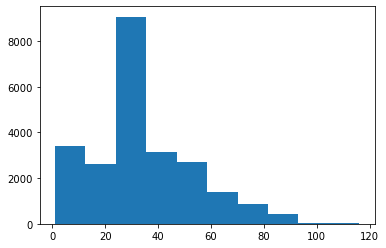

In [8]:
plt.hist(Alter)

In [9]:
Geschlecht=np.array([np.array(Pfade[i].split("\\")[-1].split("_")[1],dtype="int") for i in range(0,len(Pfade))])

<BarContainer object of 2 artists>

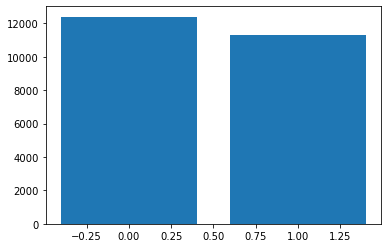

In [10]:
plt.bar(np.unique(Geschlecht,return_counts=True)[0],np.unique(Geschlecht,return_counts=True)[1])

(200, 200, 3)


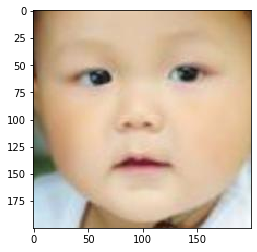

In [11]:
img=plt.imread(Pfade[400])
plt.imshow(img)
print(img.shape)

(200, 200, 3)


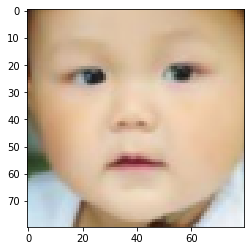

In [12]:
img=plt.imread(Pfade[400])
plt.imshow(img)
print(img.shape)
plt.imshow(resize(img,(80,80,3)))

In [ ]:
X = np.zeros((len(Pfade),80,80,3))
print(X.shape)
for i in range(0,len(Pfade)):
    img=plt.imread(Pfade[i])
    img_resized=resize(img,(80,80,3))
    X[i,:,:,:] = img_resized
    #print(i)
#takes some time

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Alter, test_size=0.2, random_state=201)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(15172, 80, 80, 3)
(3794, 80, 80, 3)
(4742, 80, 80, 3)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

In [19]:
img_rows, img_cols = 80, 80
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)

In [20]:
model = Sequential()

model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(8, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Convolution2D(16, kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('linear'))

# compile model and intitialize weights
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 80, 80, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 40, 40, 16)        0

In [22]:
# train the model
history=model.fit(X_train, y_train, 
                  batch_size=32, 
                  epochs=3,
                  verbose=1, 
                  validation_data=(X_val, y_val)
                 )
### dauert etwas lange evtl müssen die bilder noch kleiner sein 40X40 pixel

Train on 15172 samples, validate on 3794 samples
Epoch 1/3
15172/15172 [==============================] - 143s 9ms/sample - loss: 443.1442 - mse: 443.1443 - val_loss: 379.5845 - val_mse: 379.5845
Epoch 2/3
15172/15172 [==============================] - 141s 9ms/sample - loss: 338.4969 - mse: 338.4969 - val_loss: 240.9067 - val_mse: 240.9067
Epoch 3/3
15172/15172 [==============================] - 142s 9ms/sample - loss: 227.6750 - mse: 227.6751 - val_loss: 202.2629 - val_mse: 202.2629


In [23]:
history=model.fit(X_train, y_train, 
                  batch_size=32, 
                  epochs=3,
                  verbose=1, 
                  validation_data=(X_val, y_val)
                 )

Train on 15172 samples, validate on 3794 samples
Epoch 1/3
15172/15172 [==============================] - 140s 9ms/sample - loss: 189.0989 - mse: 189.0989 - val_loss: 298.4973 - val_mse: 298.4974
Epoch 2/3
 3328/15172 [=====>........................] - ETA: 1:41 - loss: 188.8518 - mse: 188.8518

KeyboardInterrupt: 

(array([ 644.,  545., 1835.,  637.,  528.,  259.,  197.,   82.,    9.,
           6.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <a list of 10 Patch objects>)

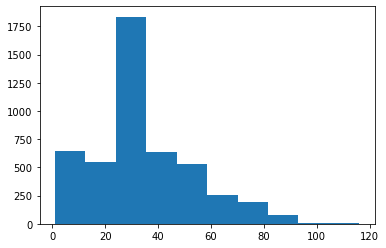

In [24]:
plt.hist(y_test)

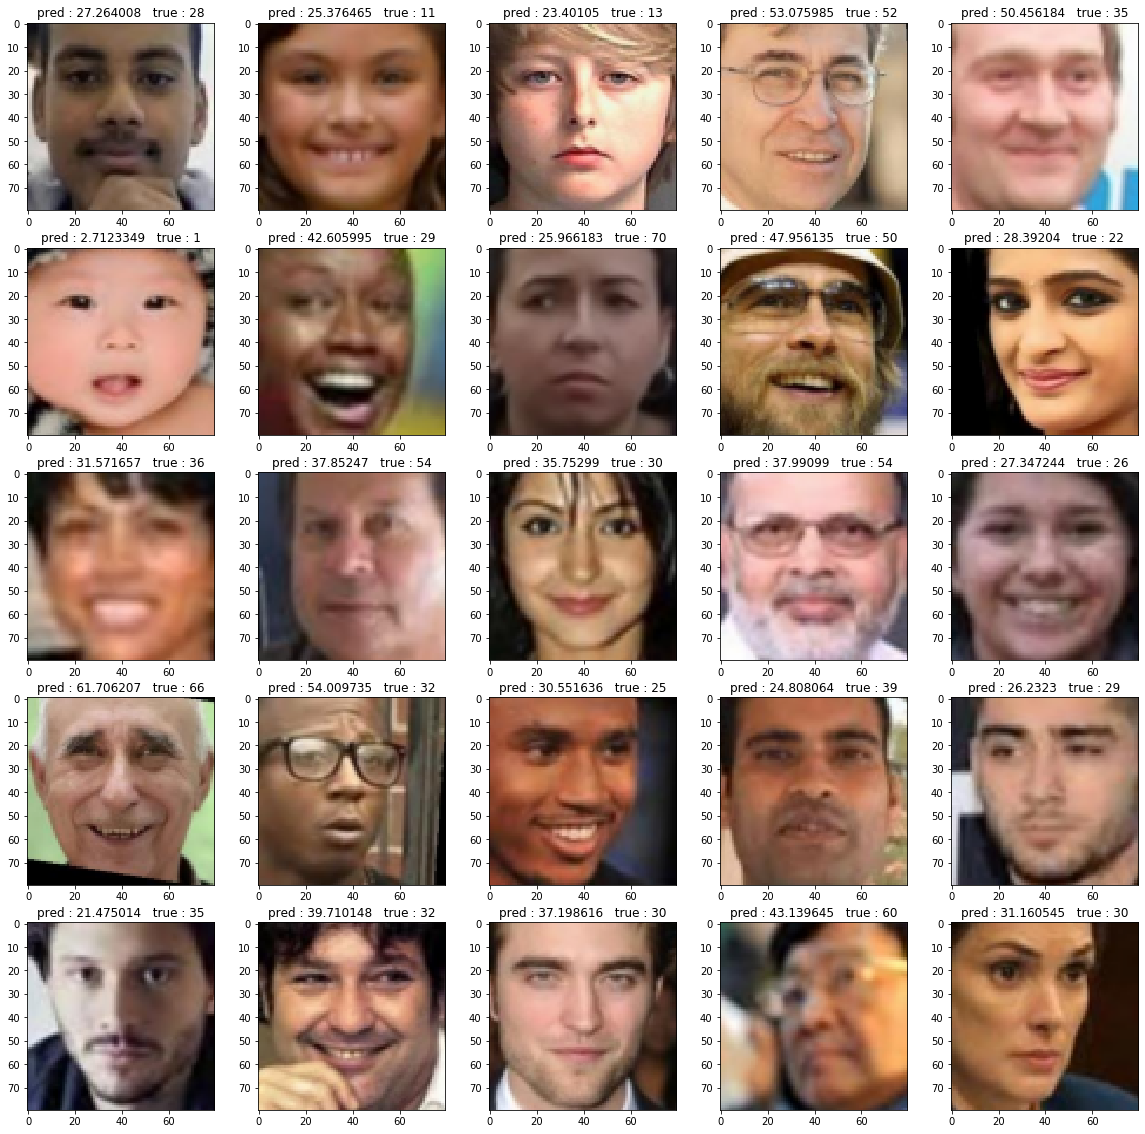

In [32]:
plt.figure(figsize=(20,20))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i])
    plt.title("pred : "+ np.str(model.predict(X_test[i:i+1])[0][0]) + "   true : "+ np.str(y_test[i]))